#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/ab8726f0cfc84544abbae69a6be88071

## Librerias

In [1]:
import pandas as pd
import numpy as np
import urllib.request
from PIL import Image

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix

## Data

In [2]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
train = pd.read_csv("data/train.csv")


## Data exploration

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  object 
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58796 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

**RevolvingUtilizationOfUnsecuredLines**: Saldo total de tarjetas de crédito y líneas de crédito personales, excepto bienes raíces y deuda sin cuotas, como préstamos para automóviles, dividido por la suma de los límites de crédito

**age**: Edad en años

**NumberOfTime30-59DaysPastDueNotWorse**: Número de veces que el prestatario ha estado vencido entre 30 y 59 días pero no ha empeorado en los últimos 2 años.

**NumberOfTime60-89DaysPastDueNotWorse**: Número de veces que el prestatario ha estado vencido entre 60 y 89 días pero no ha empeorado en los últimos 2 años.

**NumberOfTimes90DaysLate**: Número de veces que el prestatario ha estado vencido 90 o más días.

**DebtRatio**: Pagos mensuales de deuda, pensión alimenticia, costos de vida divididos por el ingreso bruto mensual

**MonthlyIncome**: Ingreso mensual

**NumberOfOpenCreditLinesAndLoans**: Número de préstamos abiertos (a plazos, como préstamos para automóviles o hipotecas) y líneas de crédito (por ejemplo, tarjetas de crédito)

**NumberRealEstateLoansOrLines**: Número de préstamos hipotecarios y inmobiliarios, incluidas líneas de crédito sobre el valor líquido de la vivienda

**NumberOfDependents**: Número de dependientes de la familia excluidos ellos mismos (cónyuge, hijos, etc.)


In [4]:
train.head()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,44164,0,0.768219,68y,1,0.687930,2178.0,12,0,1,0,0.0
1,95356,0,0.289873,52y,0,0.385497,3750.0,16,0,1,0,1.0
2,108917,0,0.000000,54y,0,0.346503,6833.0,8,0,1,0,0.0
3,99039,0,0.046064,66y,1,0.407614,5200.0,6,0,1,0,1.0
4,116168,0,0.168771,45y,0,4702.000000,NaN,10,0,3,0,1.0


In [5]:
train.describe(include="all")

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,73363.000000,73363.000000,73363.000000,73363,73363.000000,73363.000000,5.879600e+04,73363.000000,73363.000000,73363.000000,73363.000000,71421.000000
unique,NaN,NaN,NaN,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,48y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,75035.459564,0.065919,5.884904,NaN,0.410507,359.752537,6.649145e+03,8.443916,0.256546,1.019928,0.231847,0.755506
std,43303.736606,0.248142,235.508449,NaN,4.090014,2477.648064,1.046163e+04,5.142232,4.066573,1.136357,4.052280,1.111715
min,2.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37449.000000,0.000000,0.029752,NaN,0.000000,0.173446,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75032.000000,0.000000,0.154688,NaN,0.000000,0.365737,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112628.500000,0.000000,0.558686,NaN,0.000000,0.863514,8.300000e+03,11.000000,0.000000,2.000000,0.000000,1.000000


In [6]:
train.columns

Index(['Id', 'target', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

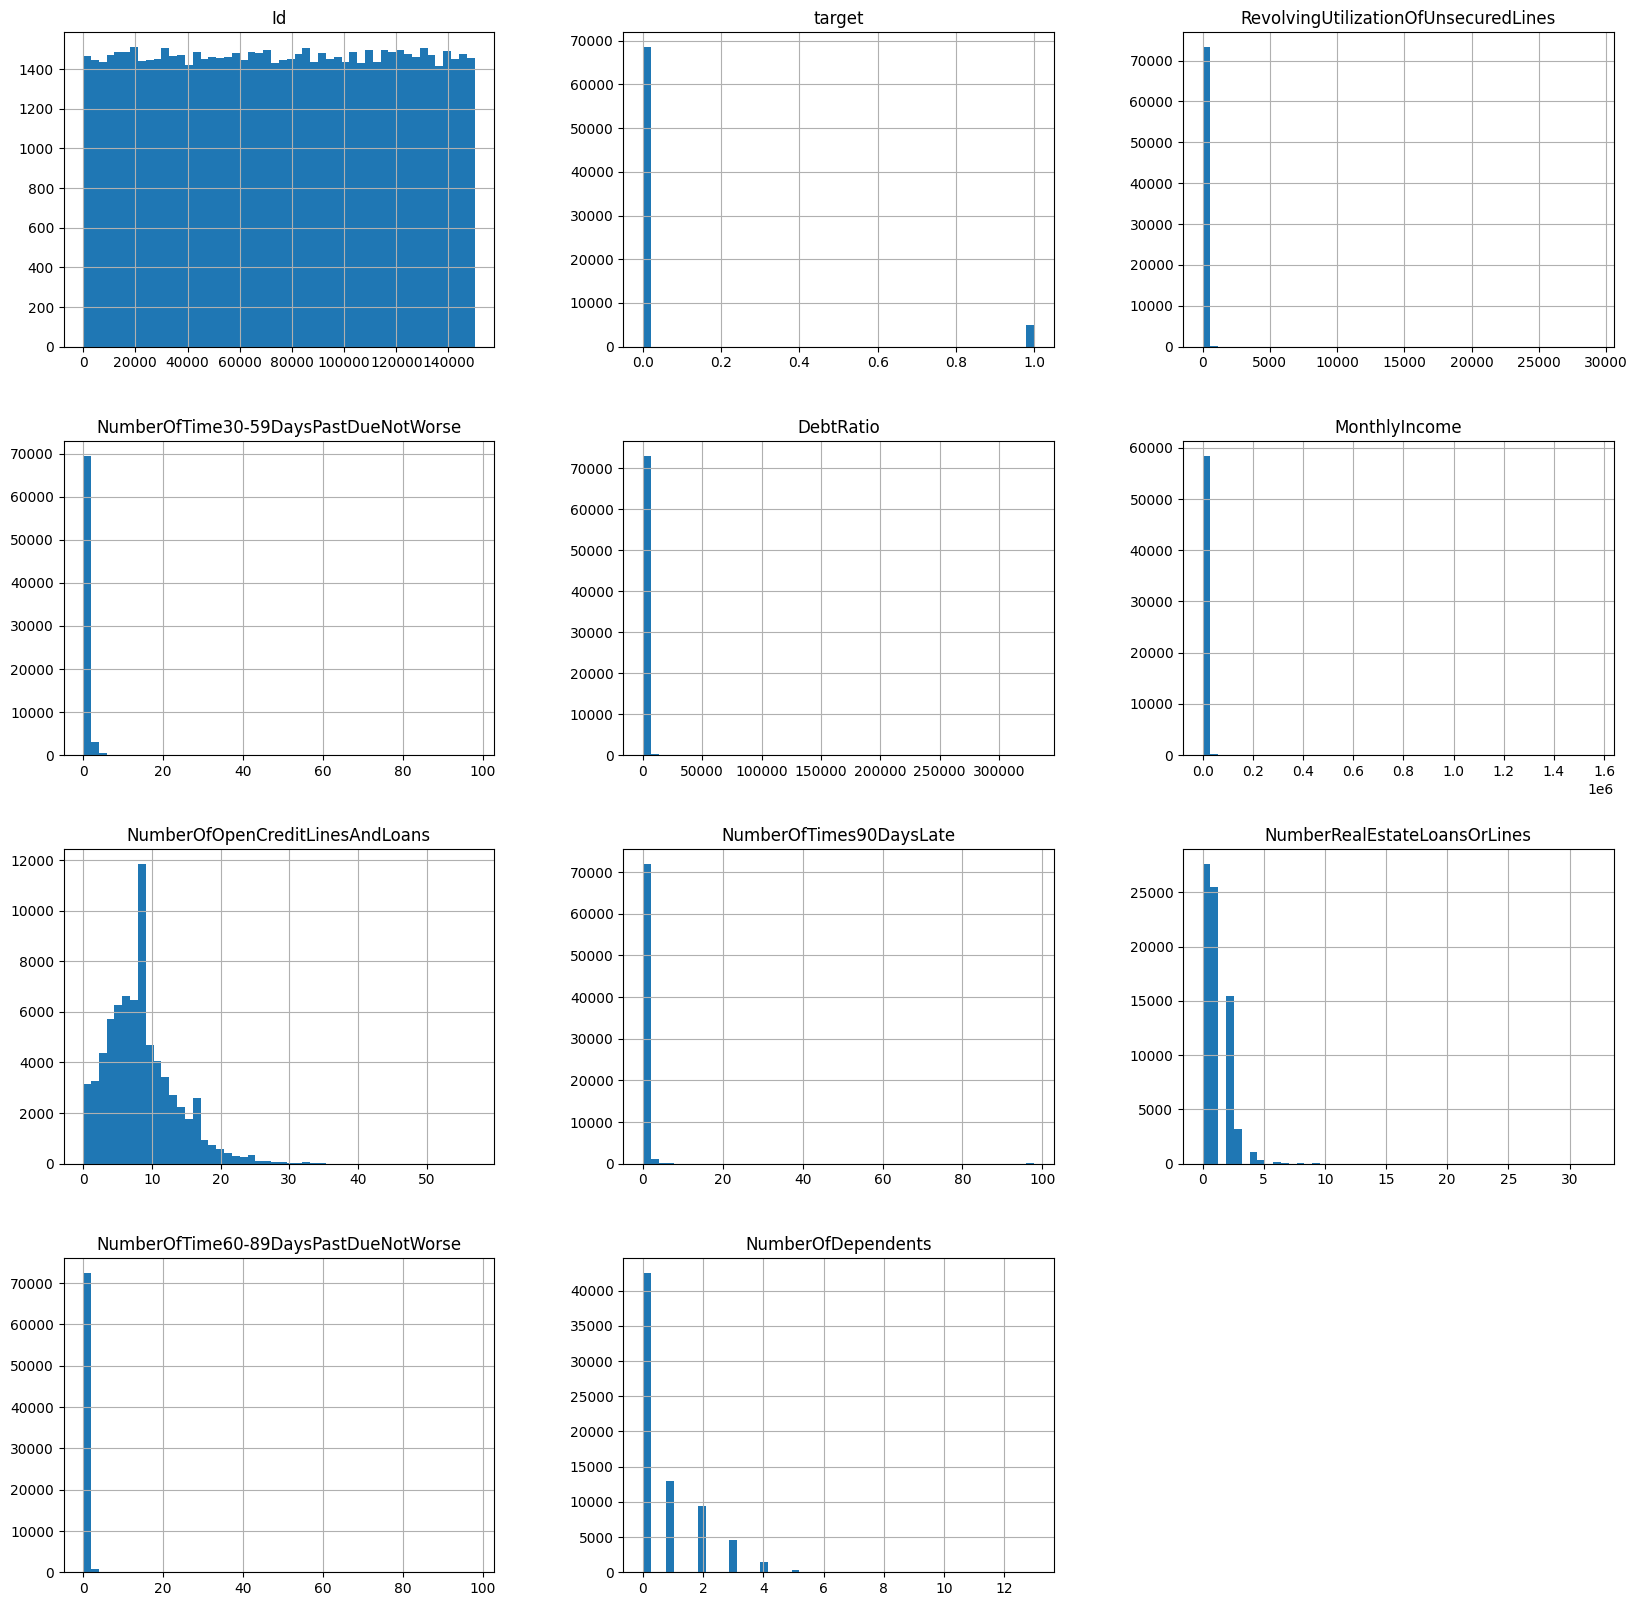

In [7]:
train.hist(bins=50, figsize=(20,20))
plt.show()

## Data processing

In [8]:
train["age"] = train["age"].str.replace("y","").astype("int64")

In [9]:
train["NumberOfTimesPastDue"] = train['NumberOfTime30-59DaysPastDueNotWorse'] + train['NumberOfTime60-89DaysPastDueNotWorse'] + train['NumberOfTimes90DaysLate']

In [10]:
train.isna().sum()/train.shape[0]*100

Id                                       0.000000
target                                   0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.856058
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.647111
NumberOfTimesPastDue                     0.000000
dtype: float64

In [11]:
train["MonthlyIncome"].fillna(train["MonthlyIncome"].mean(), inplace=True)
train["NumberOfDependents"].fillna(train["NumberOfDependents"].mean(), inplace=True)

In [12]:
train.describe()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,NumberOfTimesPastDue
count,73363.000000,73363.000000,73363.000000,73363.000000,73363.000000,73363.000000,7.336300e+04,73363.000000,73363.000000,73363.000000,73363.000000,73363.000000,73363.000000
mean,75035.459564,0.065919,5.884904,52.362908,0.410507,359.752537,6.649145e+03,8.443916,0.256546,1.019928,0.231847,0.755506,0.898900
std,43303.736606,0.248142,235.508449,14.781089,4.090014,2477.648064,9.365566e+03,5.142232,4.066573,1.136357,4.052280,1.096902,12.156884
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37449.000000,0.000000,0.029752,41.000000,0.000000,0.173446,3.900000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75032.000000,0.000000,0.154688,52.000000,0.000000,0.365737,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,112628.500000,0.000000,0.558686,63.000000,0.000000,0.863514,7.401500e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,149998.000000,1.000000,29110.000000,105.000000,98.000000,329664.000000,1.560100e+06,57.000000,98.000000,32.000000,98.000000,13.000000,294.000000


In [13]:
cols_mmax = ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio"]

mmax = MinMaxScaler()

mmax.fit(train[cols_mmax])
train[cols_mmax] = mmax.transform(train[cols_mmax])

sca = StandardScaler()
train["MonthlyIncome"] = sca.fit_transform(train[["MonthlyIncome"]])

In [14]:
train.describe()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,NumberOfTimesPastDue
count,73363.000000,73363.000000,73363.000000,73363.000000,73363.000000,7.336300e+04,7.336300e+04,73363.000000,73363.000000,73363.000000,73363.000000,73363.000000,73363.000000
mean,75035.459564,0.065919,0.000202,52.362908,0.410507,1.091270e-03,-3.583561e-17,8.443916,0.256546,1.019928,0.231847,0.755506,0.898900
std,43303.736606,0.248142,0.008090,14.781089,4.090014,7.515677e-03,1.000007e+00,5.142232,4.066573,1.136357,4.052280,1.096902,12.156884
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-7.099614e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37449.000000,0.000000,0.000001,41.000000,0.000000,5.261293e-07,-2.935395e-01,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75032.000000,0.000000,0.000005,52.000000,0.000000,1.109425e-06,-5.247414e-03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,112628.500000,0.000000,0.000019,63.000000,0.000000,2.619377e-06,8.033262e-02,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,149998.000000,1.000000,1.000000,105.000000,98.000000,1.000000e+00,1.658695e+02,57.000000,98.000000,32.000000,98.000000,13.000000,294.000000


-----------------------------------------------------------------------------------------------------------------

## Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [15]:
X = train.drop(columns=["NumberOfTimesPastDue", "Id", "target"])
y = train["target"]

### 2. Dividir X_train, X_test, y_train, y_test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### 3. Asignar el modelo (vacío) a una variable


In [18]:
# rl = LogisticRegression()
# rl.fit(X_train, y_train)

In [19]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42, max_iter=10000)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [20]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.9361412117494718
rf = 0.9370271928031078
svc = 0.936481973693178


### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de AUC.

In [21]:
pred = voting_clf.predict(X_test)

In [22]:
# pred = rl.predict(X_test)

In [23]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
score = f1_score(y_test, pred)
score

0.04693877551020408

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `test.csv` para predecir.

In [25]:
test = pd.read_csv("data/test.csv")
test.head()

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,15576,0.051782,53y,0,0.009350,2245.0,3,0,0,0,0.0
1,94308,0.022133,57y,0,0.319562,7672.0,26,0,1,0,2.0
2,53983,0.013693,68y,0,0.139237,4064.0,4,0,0,0,1.0
3,61359,0.018568,74y,0,0.018760,10500.0,27,0,0,0,0.0
4,71383,0.008630,66y,0,9.000000,NaN,5,0,0,0,0.0


In [26]:
test["age"] = test["age"].str.replace("y","").astype("int64")
test["NumberOfTimesPastDue"] = test['NumberOfTime30-59DaysPastDueNotWorse'] + test['NumberOfTime60-89DaysPastDueNotWorse'] + test['NumberOfTimes90DaysLate']

test["NumberOfTimesPastDue"] = test['NumberOfTime30-59DaysPastDueNotWorse'] + test['NumberOfTime60-89DaysPastDueNotWorse'] + test['NumberOfTimes90DaysLate']

cols_mmax = ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio"]

mmax = MinMaxScaler()

mmax.fit(test[cols_mmax])
test[cols_mmax] = mmax.transform(test[cols_mmax])

sca = StandardScaler()
test["MonthlyIncome"] = sca.fit_transform(test[["MonthlyIncome"]])

In [27]:
test["MonthlyIncome"].fillna(test["MonthlyIncome"].mean(), inplace=True)
test["NumberOfDependents"].fillna(test["NumberOfDependents"].mean(), inplace=True)

In [28]:
X_pred=test.drop(columns=["NumberOfTimesPastDue", "Id"])

In [29]:
X_pred

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,3.717302e-06,53,0,1.510323e-07,-1.909125e-01,3,0,0,0,0.0
1,1.588877e-06,57,0,5.161970e-06,3.822092e-02,26,0,1,0,2.0
2,9.829631e-07,68,0,2.249138e-06,-1.141125e-01,4,0,0,0,1.0
3,1.332940e-06,74,0,3.030371e-07,1.576219e-01,27,0,0,0,0.0
4,6.195191e-07,66,0,1.453794e-04,1.056182e-17,5,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
31437,3.370073e-05,28,0,4.696149e-07,-1.942479e-01,1,0,0,0,0.0
31438,1.234098e-05,44,0,6.066472e-06,-3.942350e-02,8,0,2,0,4.0
31439,3.475661e-07,51,1,4.845979e-04,-2.856986e-01,3,0,0,0,2.0
31440,4.569660e-05,42,0,7.817062e-06,9.848403e-03,10,2,1,0,1.0


IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [30]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [31]:
# predictions_submit = rl.predict(X_pred)
predictions_submit = voting_clf.predict(X_pred)
predictions_submit

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [32]:
sample = pd.read_csv("data/sample_submission.csv")

In [33]:
sample.head()

,Id,target
0,15576,0
1,94308,1
2,53983,1
3,61359,1
4,71383,0


In [34]:
sample.shape

(31442, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [35]:
submission = pd.DataFrame({"Id": sample['Id'], "target": predictions_submit})

In [36]:
submission.head()

,Id,target
0,15576,0
1,94308,0
2,53983,0
3,61359,0
4,71383,0


In [37]:
submission.shape

(31442, 2)

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [38]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.Id.all() == sample.Id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [39]:
chequeator(submission)

You're ready to submit!
